In [1]:
import pyflowbat as pfb
import numpy as np

In [2]:
my_wrkspc = pfb.pyflowbat.Workspace(full_output=True)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2313.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):                    3.86e-11
Time:                        06:40:32   Log-Likelihood:                         -129.57
No. Observations:                   9   AIC:                                      261.1
Df Residuals:                       8   BIC:                                      261.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/elliberes/.pyenv/versions/3.11.4/envs/pyflowbat/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


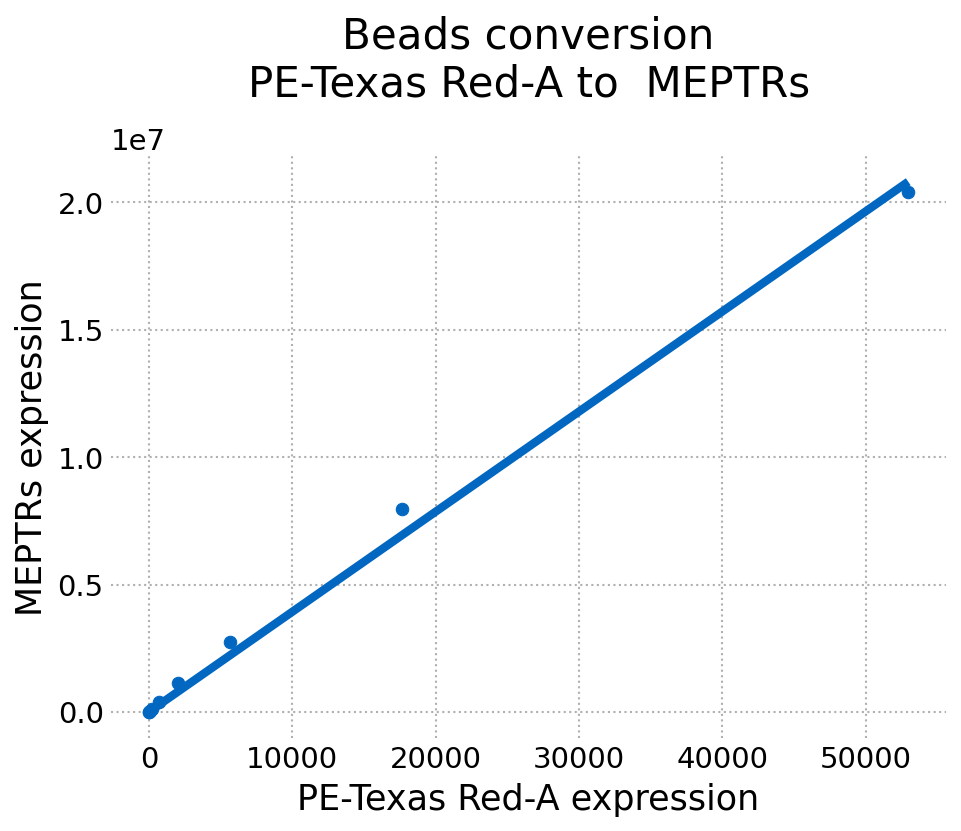

/Users/elliberes/.pyenv/versions/3.11.4/envs/pyflowbat/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9823.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):                    1.20e-13
Time:                        06:40:32   Log-Likelihood:                         -115.14
No. Observations:                   9   AIC:                                      232.3
Df Residuals:                       8   BIC:                                      232.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

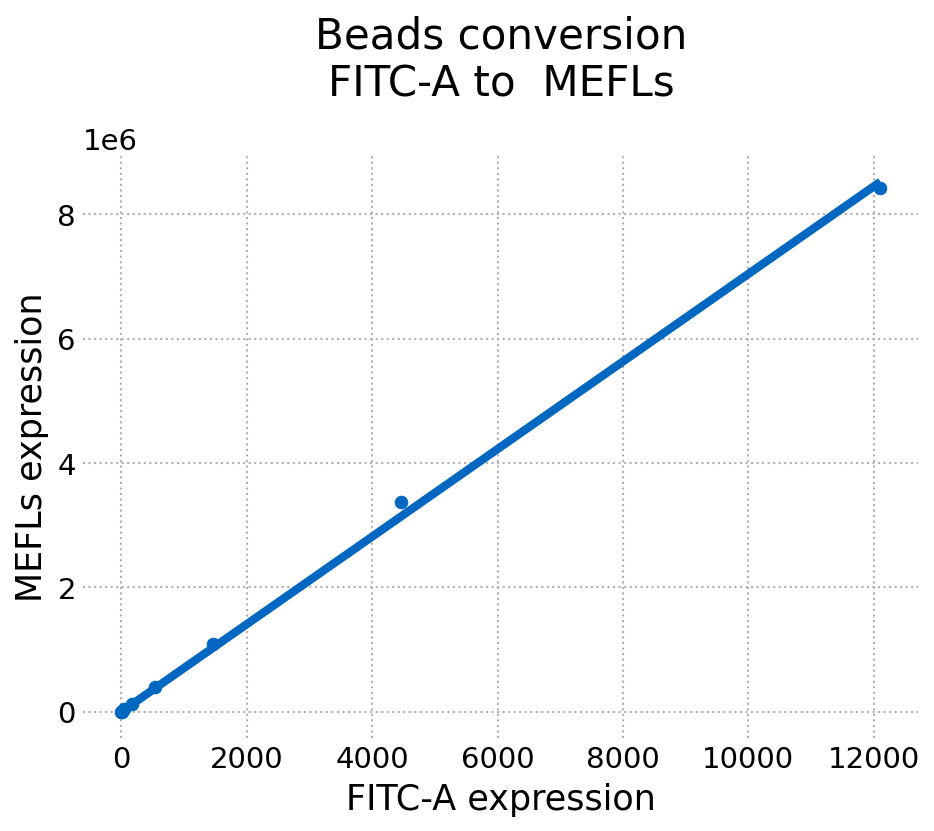

In [3]:
my_wrkspc.calculate_beads_factors(
    beads_file_file_path="./ebrc-poster-example-data/Beads_After.fcs",
    beads_fluorescent_channels=[
        ("PE-Texas Red-A", "MEPTRs"),
        ("FITC-A", "MEFLs")
    ],
    beads_num_pops=9
)

In [4]:
my_wrkspc.load_samples(
    sample_collection_name="raw",
    samples_folder_path="./ebrc-poster-example-data/",
    include=['.fcs'],
    not_include=['Beads']
)

665_I_002.fcs


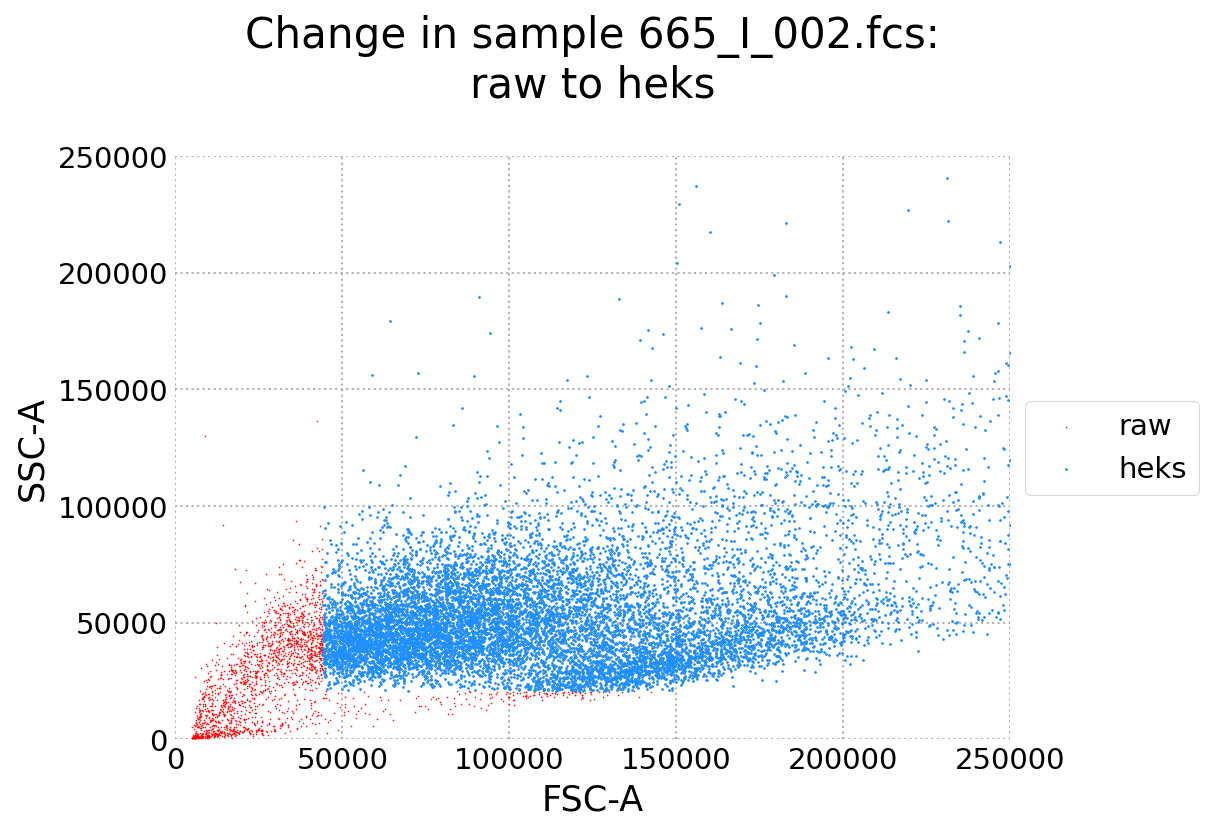

667_H_003.fcs


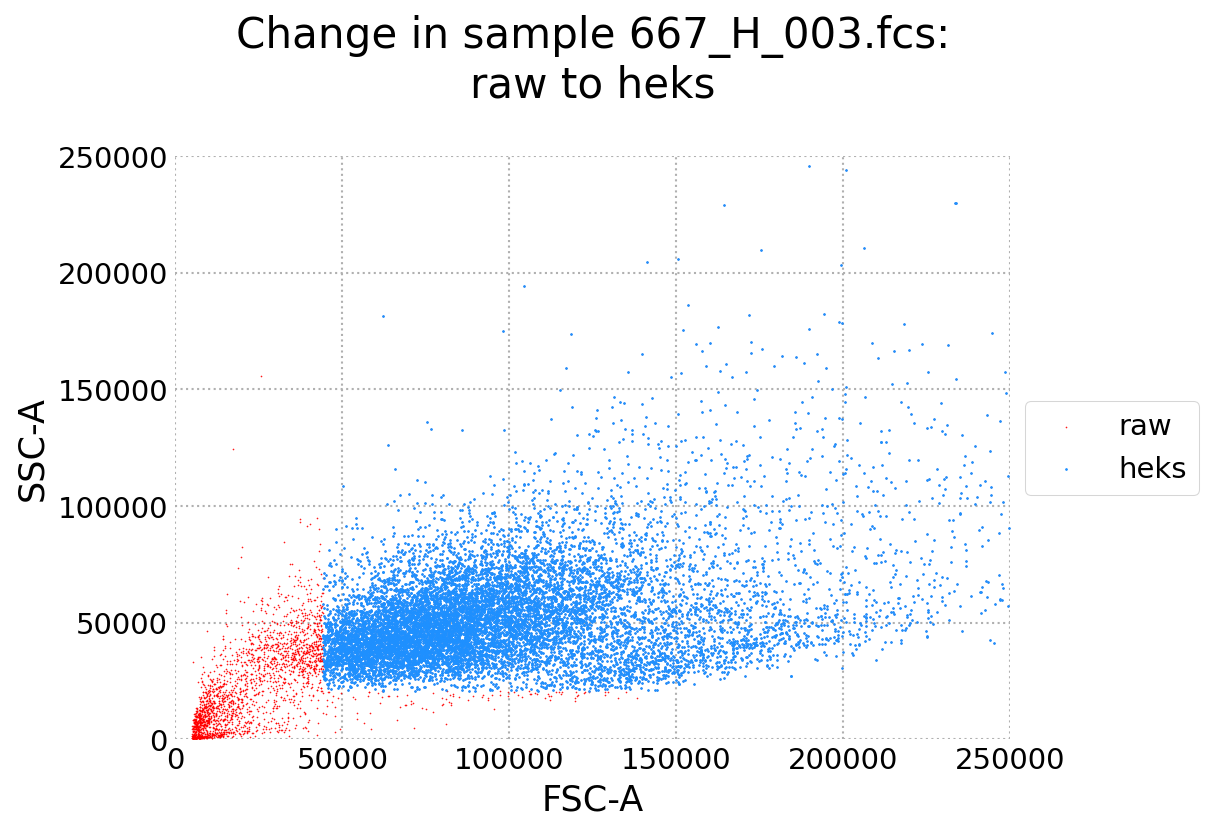

668_P_002.fcs


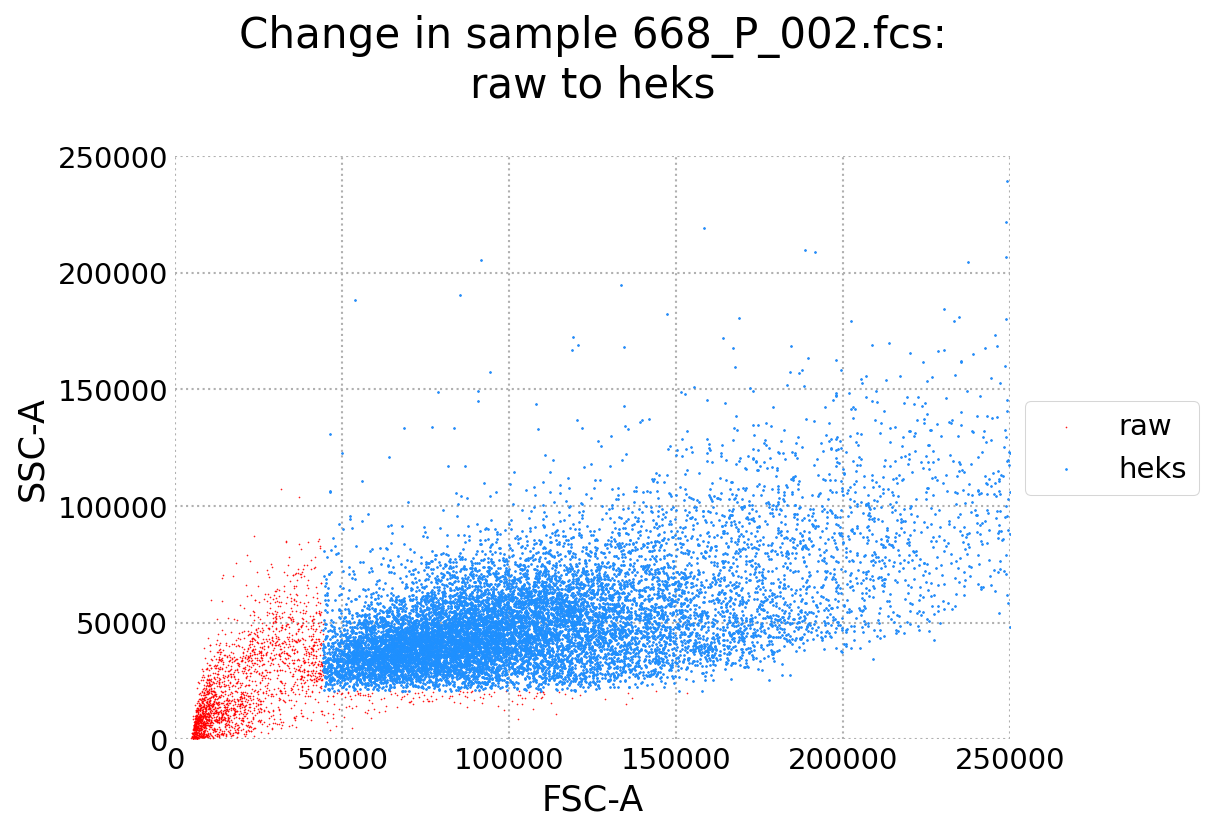

670_N_003.fcs


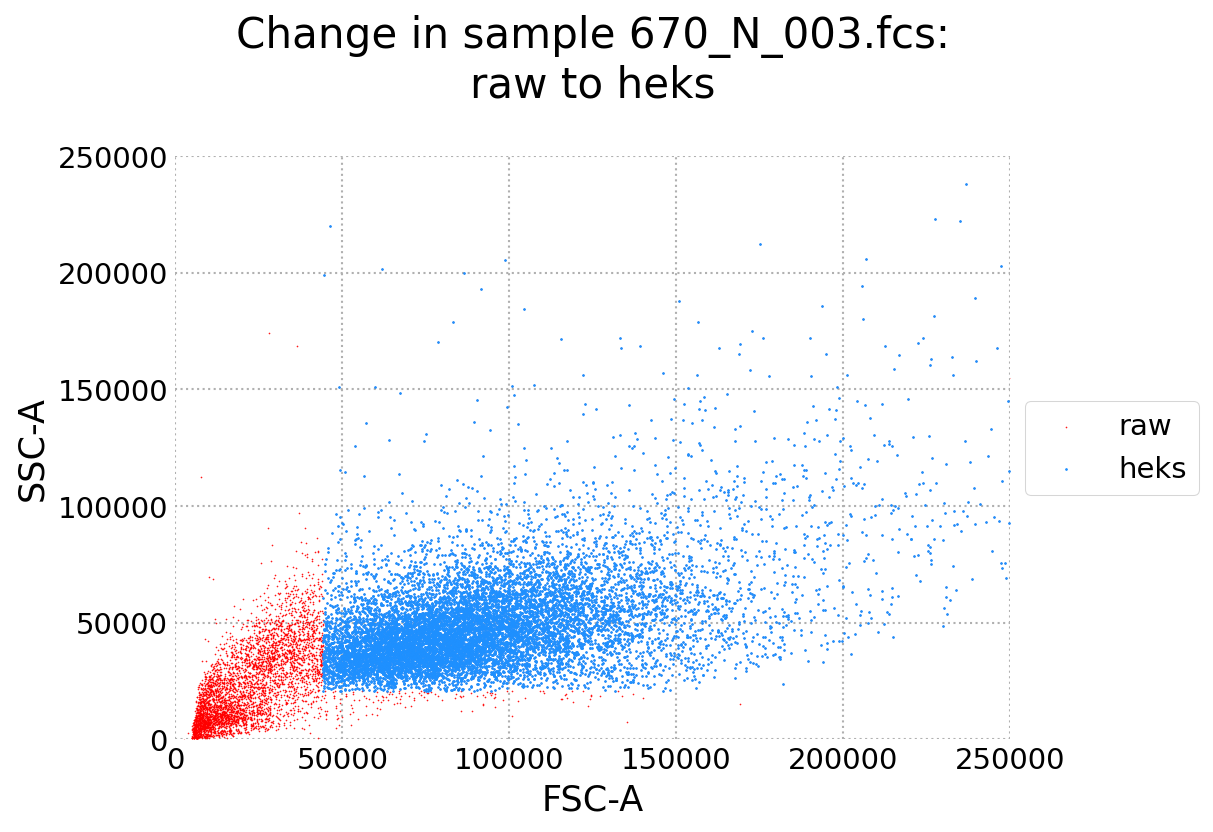

671_C_001.fcs


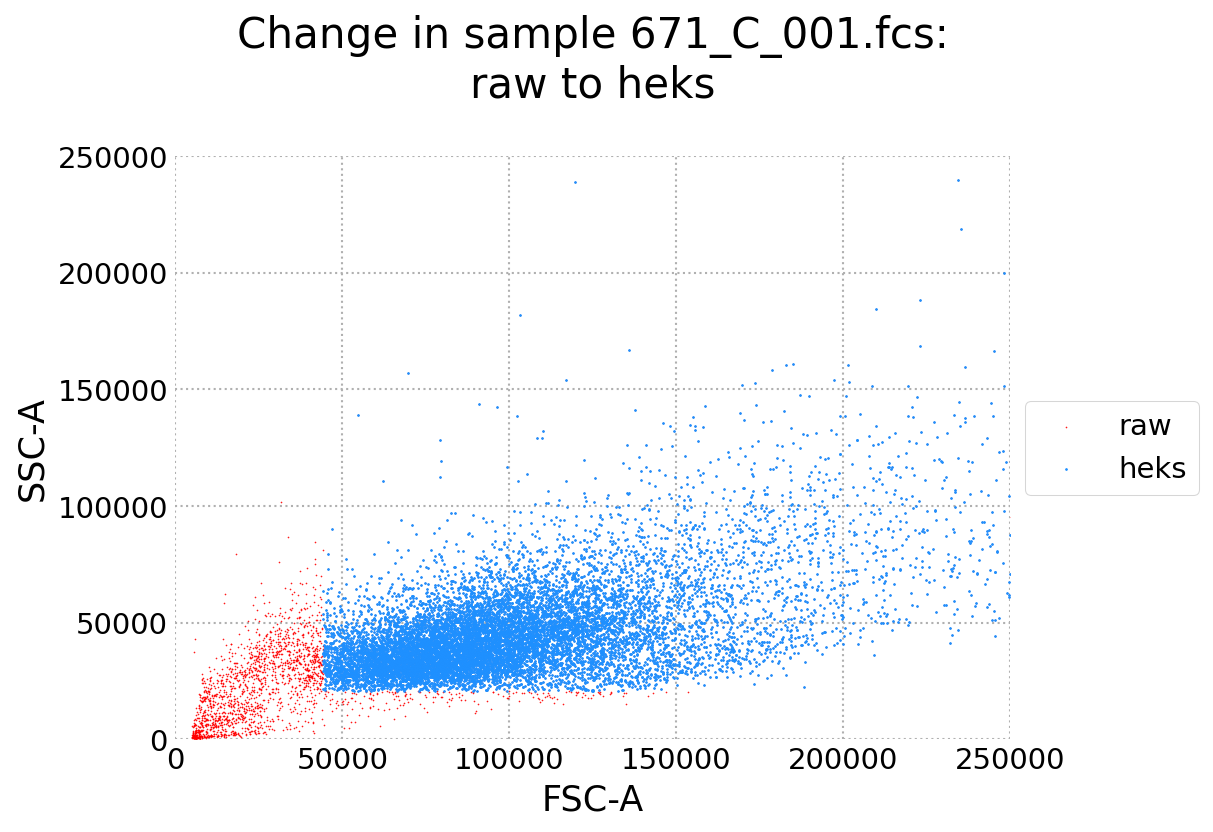

In [5]:
my_wrkspc.apply_gate(
    sample_collection_name='raw',
    new_sample_collection_name='heks',
    gating_function=pfb.gating.gate_heks,
    method = 'same',
    samples = ['373_C_001.fcs', '664_D_002.fcs', '373_M_001.fcs']
)

665_E_003.fcs


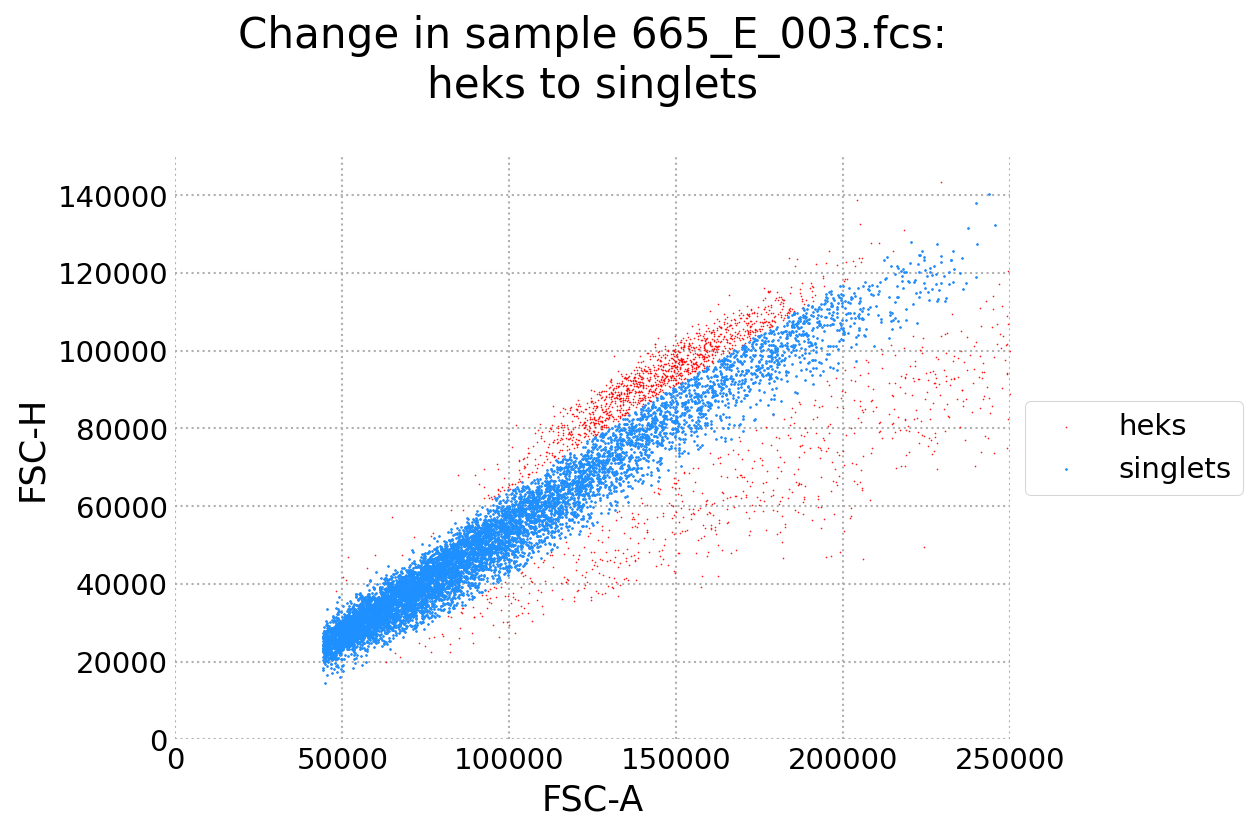

373_D_002.fcs


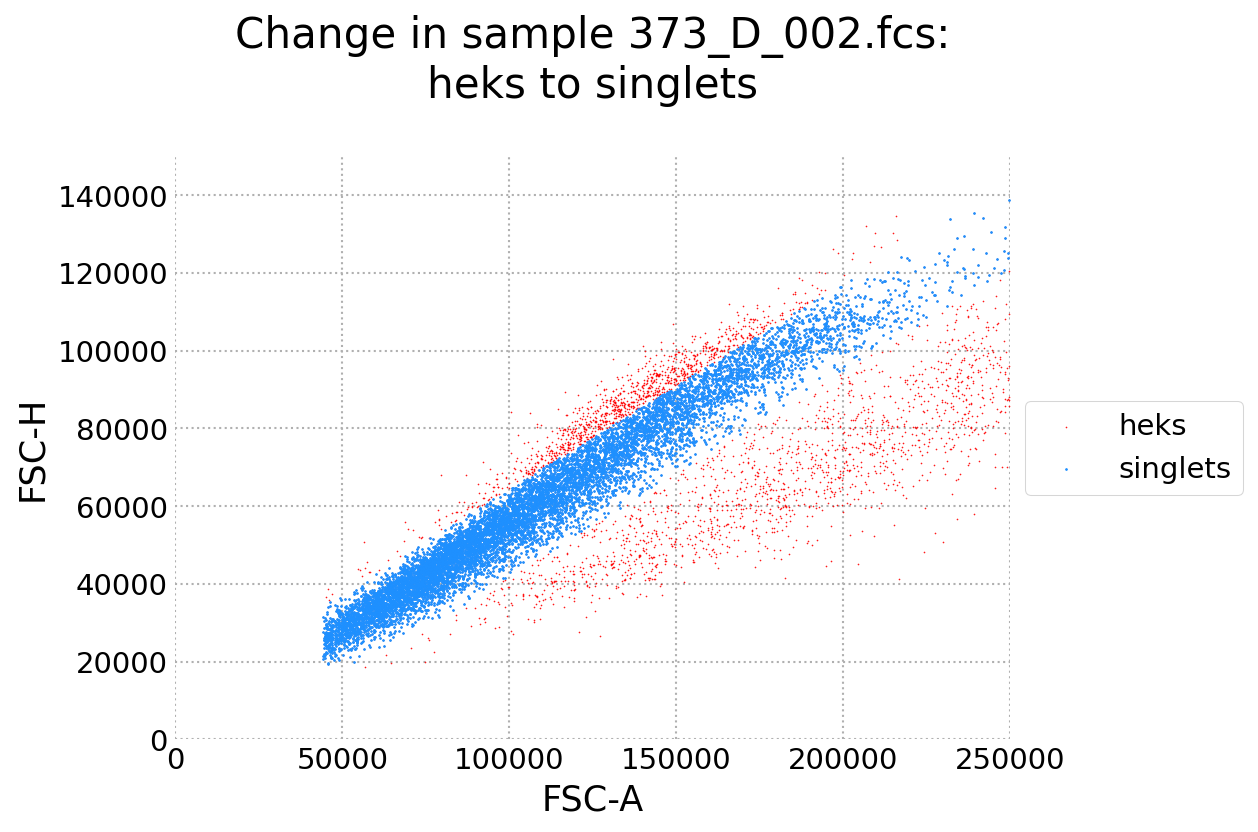

664_O_003.fcs


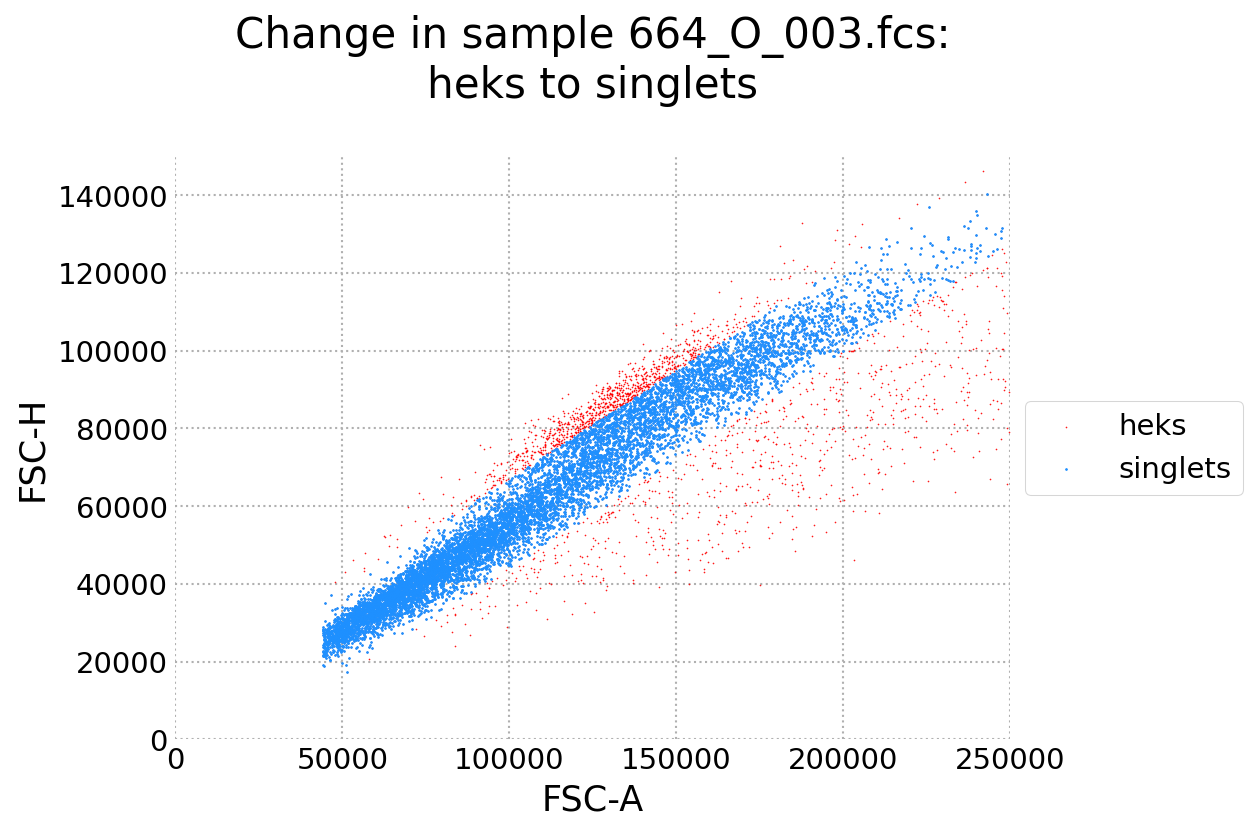

667_P_002.fcs


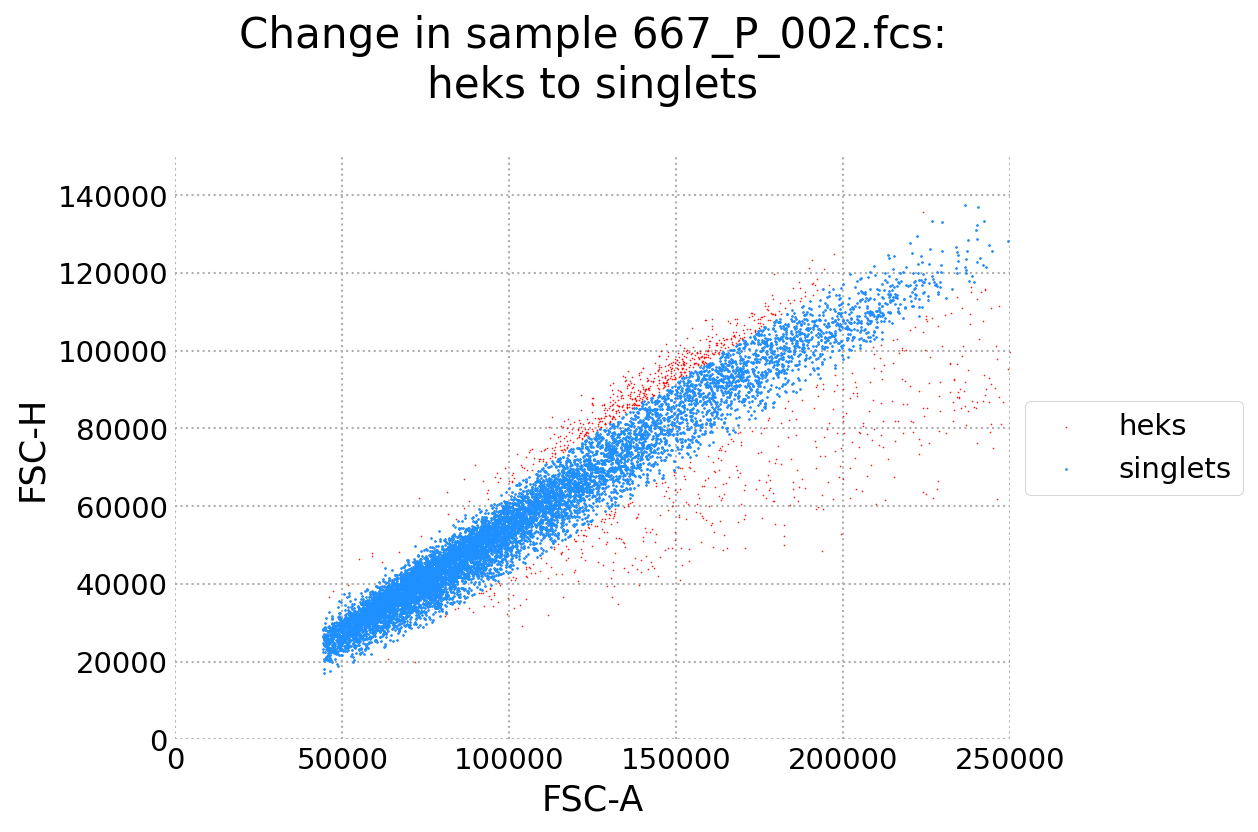

672_I_001.fcs


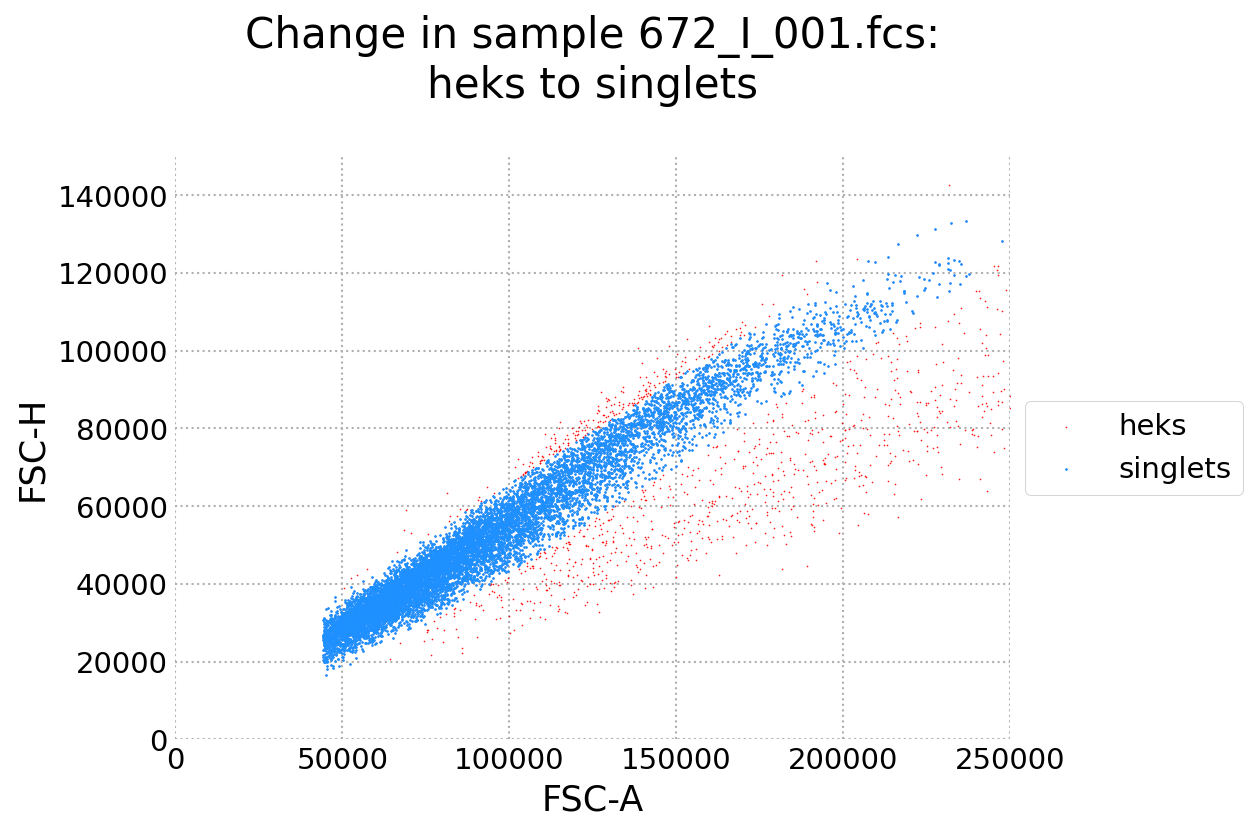

In [6]:
my_wrkspc.apply_gate(
    sample_collection_name='heks',
    new_sample_collection_name='singlets',
    gating_function=pfb.gating.gate_singlets,
    gating_channel_names=["FSC-A", "FSC-H"],
    b=1*10**4
)

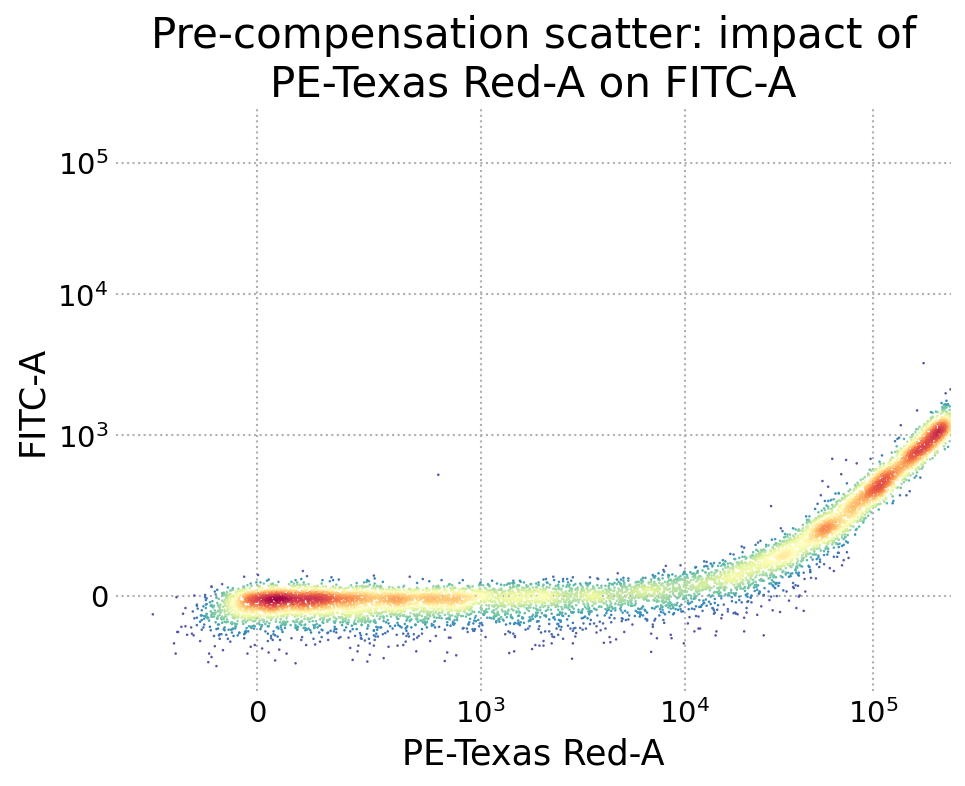

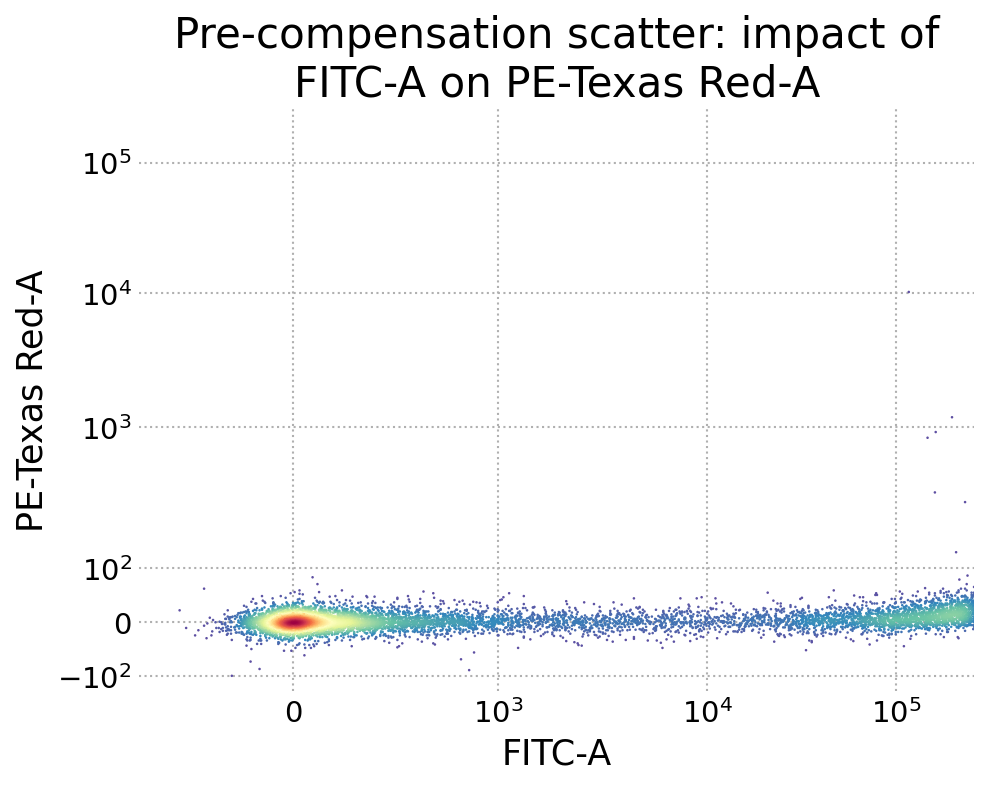

Iteration: 0
C:
[[1. 0.]
 [0. 1.]]

Errors: 0.00018580076, 0.005000799



Iteration: 1
C:
[[ 1.00000000e+00 -1.85800764e-05]
 [-5.00079885e-04  1.00000000e+00]]

Errors: 0.00016722, 0.004500719



Iteration: 2
C:
[[ 1.00000000e+00 -3.53020769e-05]
 [-9.50151763e-04  1.00000000e+00]]

Errors: 0.00015049738, 0.004050648



Iteration: 3
C:
[[ 1.00000000e+00 -5.03518149e-05]
 [-1.35521655e-03  1.00000000e+00]]

Errors: 0.00013544712, 0.0036455835



Iteration: 4
C:
[[ 1.00000000e+00 -6.38965266e-05]
 [-1.71977491e-03  1.00000000e+00]]

Errors: 0.00012190194, 0.0032810248



Iteration: 5
C:
[[ 1.00000000e+00 -7.60867206e-05]
 [-2.04787738e-03  1.00000000e+00]]

Errors: 0.00010971132, 0.0029529226



Iteration: 6
C:
[[ 1.00000000e+00 -8.70578524e-05]
 [-2.34316965e-03  1.00000000e+00]]

Errors: 9.873979e-05, 0.0026576305



Iteration: 7
C:
[[ 1.00000000e+00 -9.69318316e-05]
 [-2.60893270e-03  1.00000000e+00]]

Errors: 8.886547e-05, 0.002391867



Iteration: 8
C:
[[ 1.00000000e+00 -1.05818379

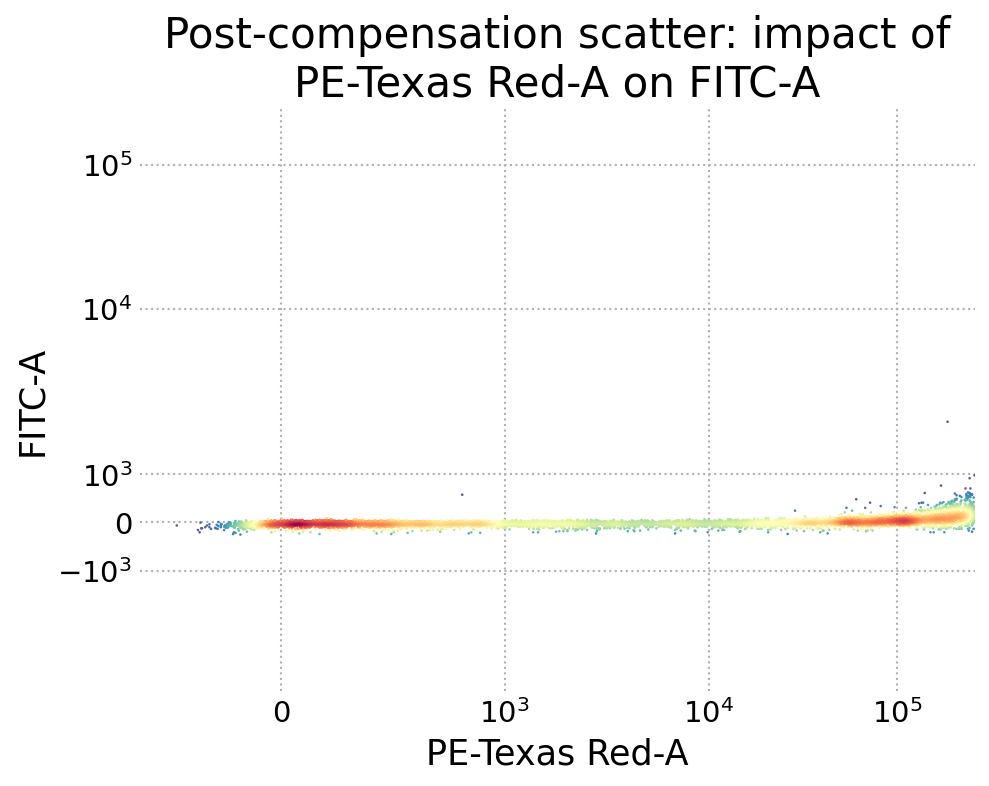

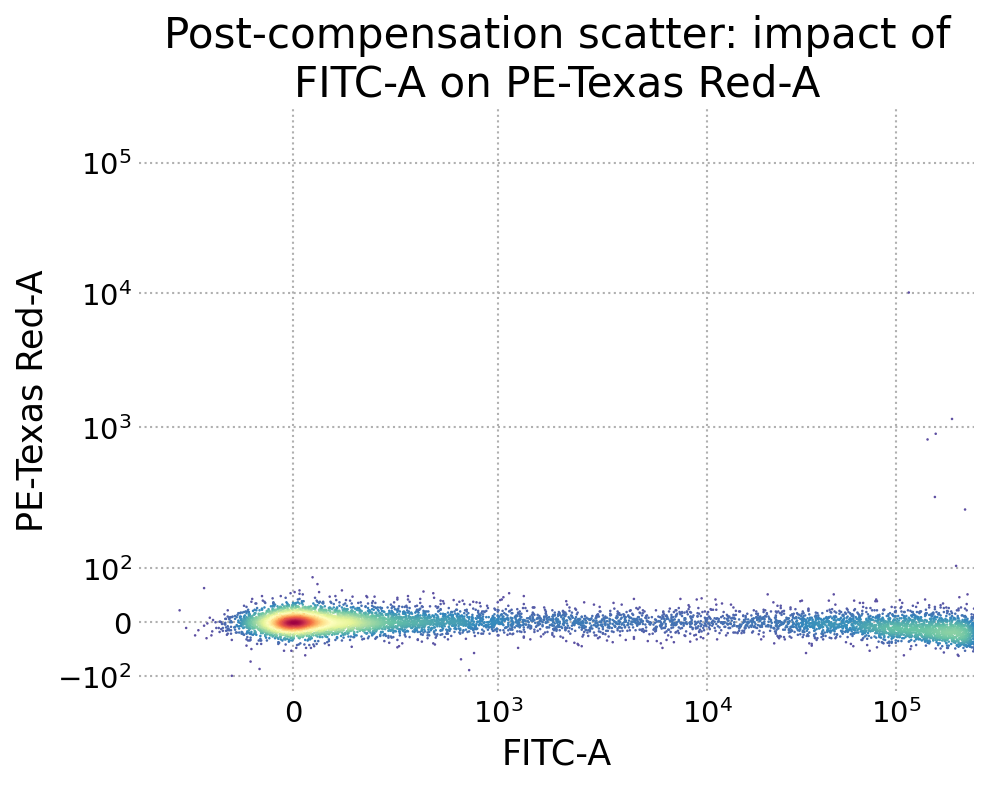

[[ 1.00000000e+00 -1.54810986e-04]
 [-4.16680712e-03  1.00000000e+00]]


In [7]:
my_wrkspc.calculate_compensation_matrix(
    sample_collection_name="singlets",
    compensation_sample_names=['Colors_DsRE2.fcs', 'Colors_mNG.fcs'],
    compensation_channel_names=['PE-Texas Red-A', 'FITC-A'],
    threshold=10**-3
)

In [8]:
my_wrkspc.apply_compensation_matrix(
    sample_collection_name="singlets",
    new_sample_collection_name="compensated"
)

666_N_001.fcs


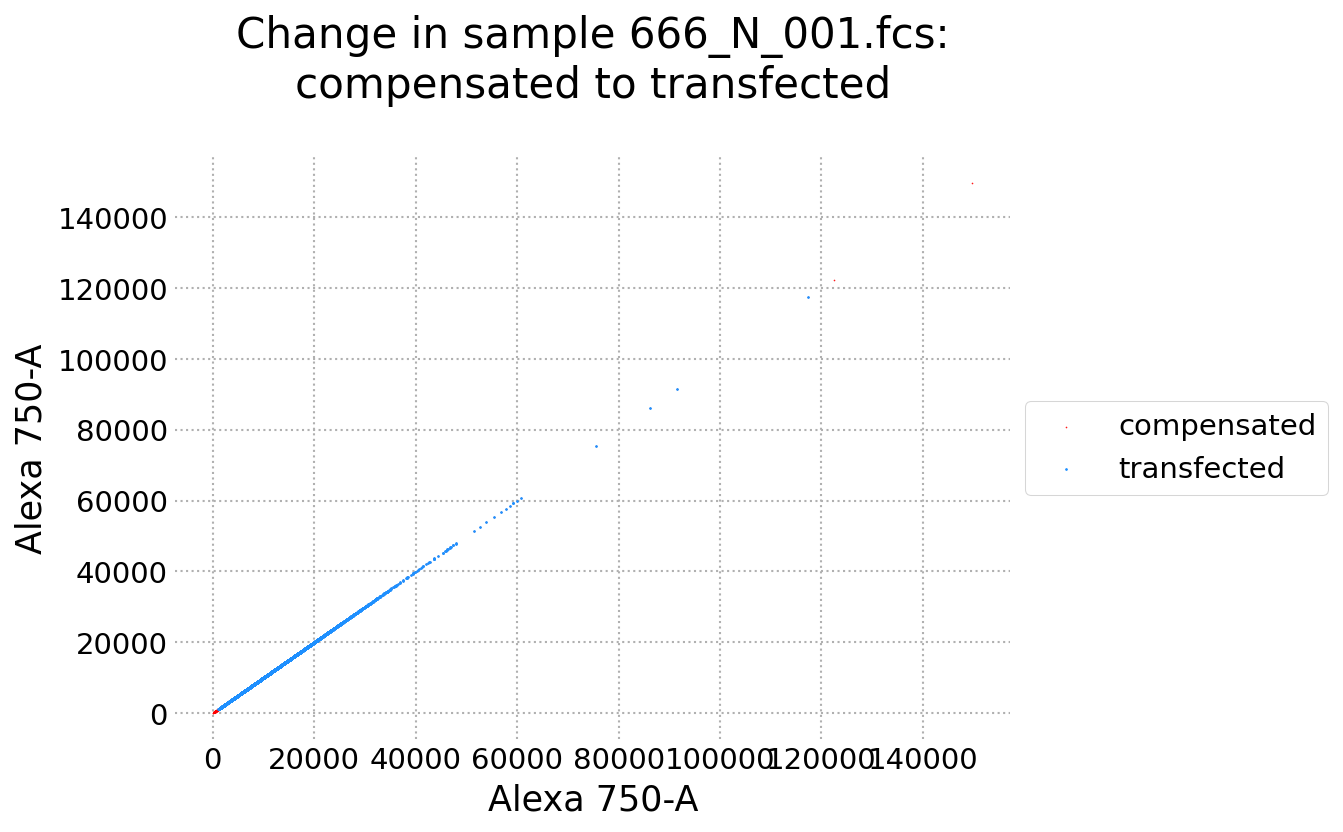

664_L_001.fcs


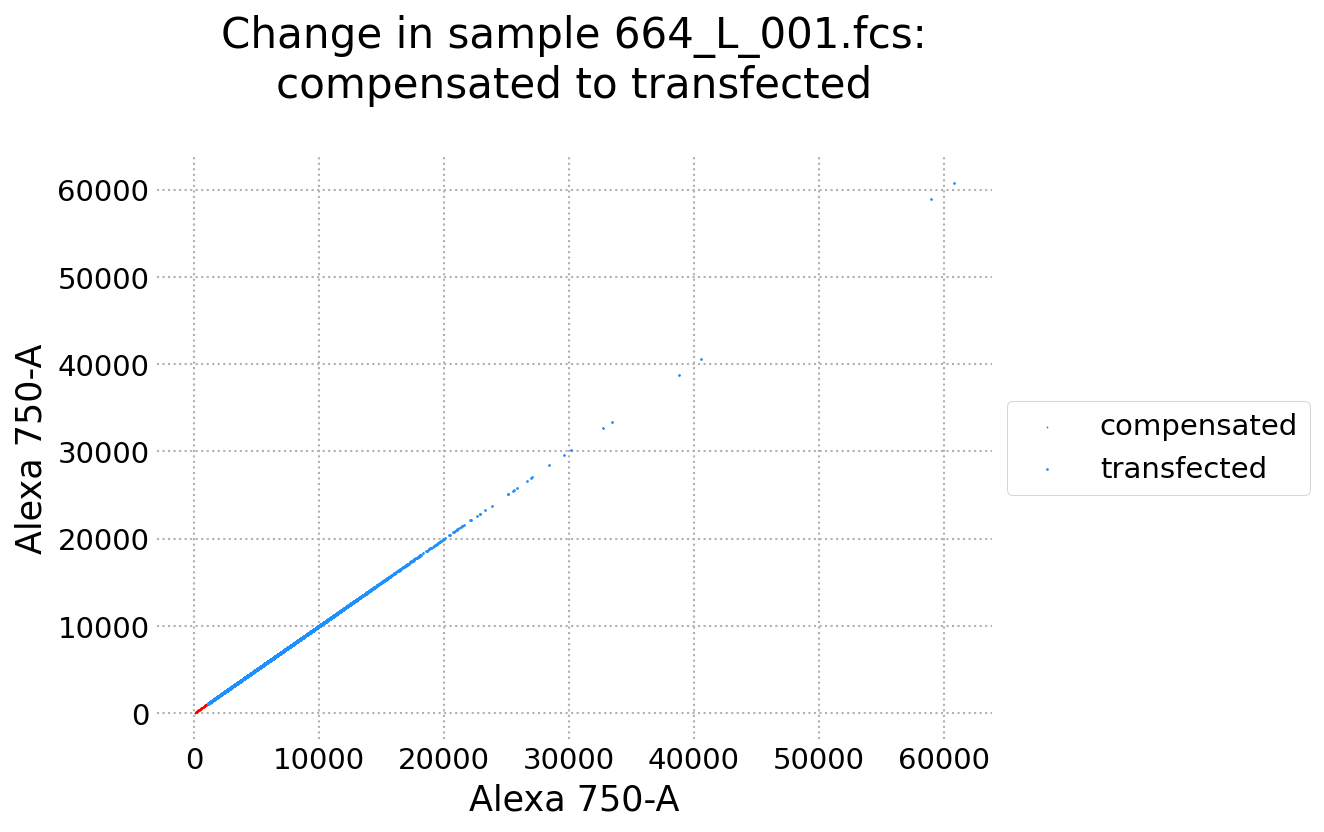

667_D_001.fcs


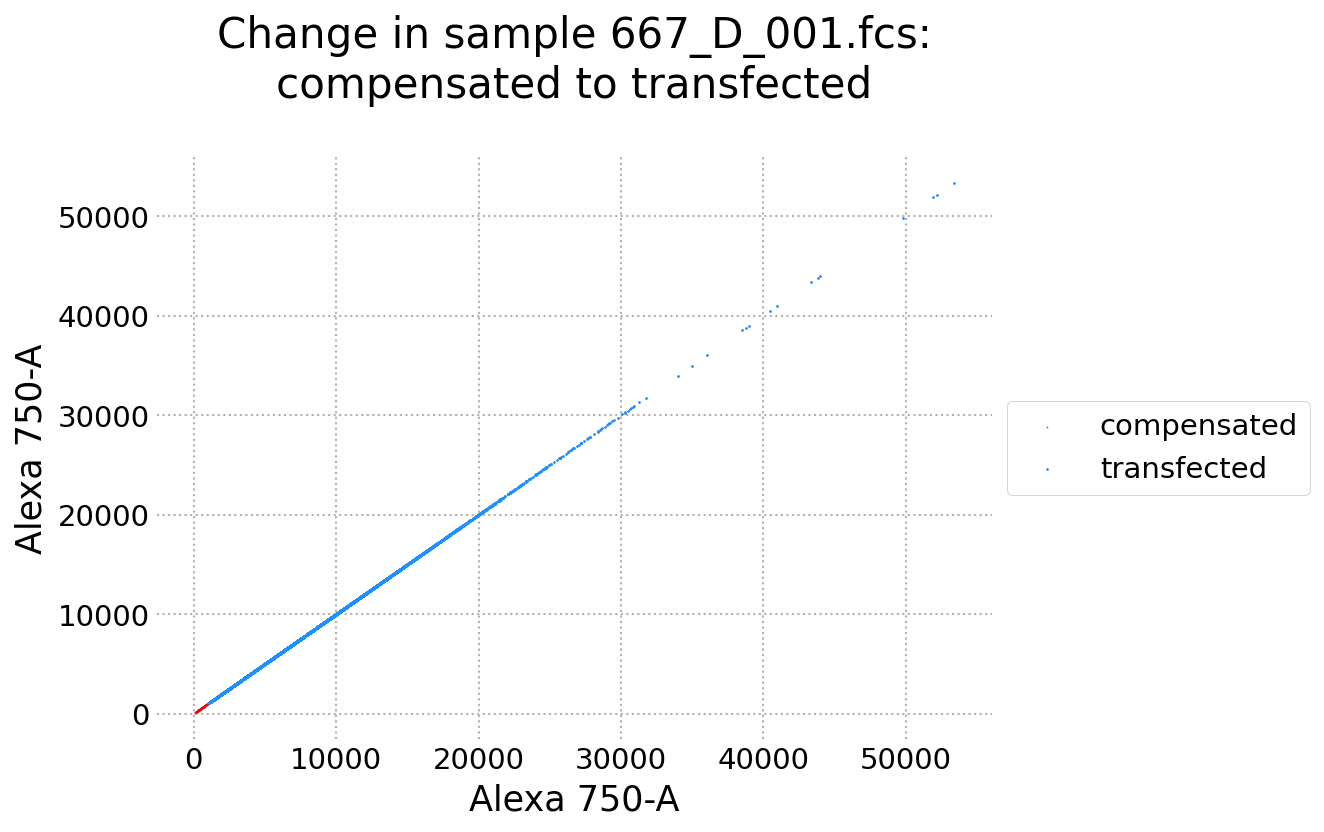

672_B_001.fcs


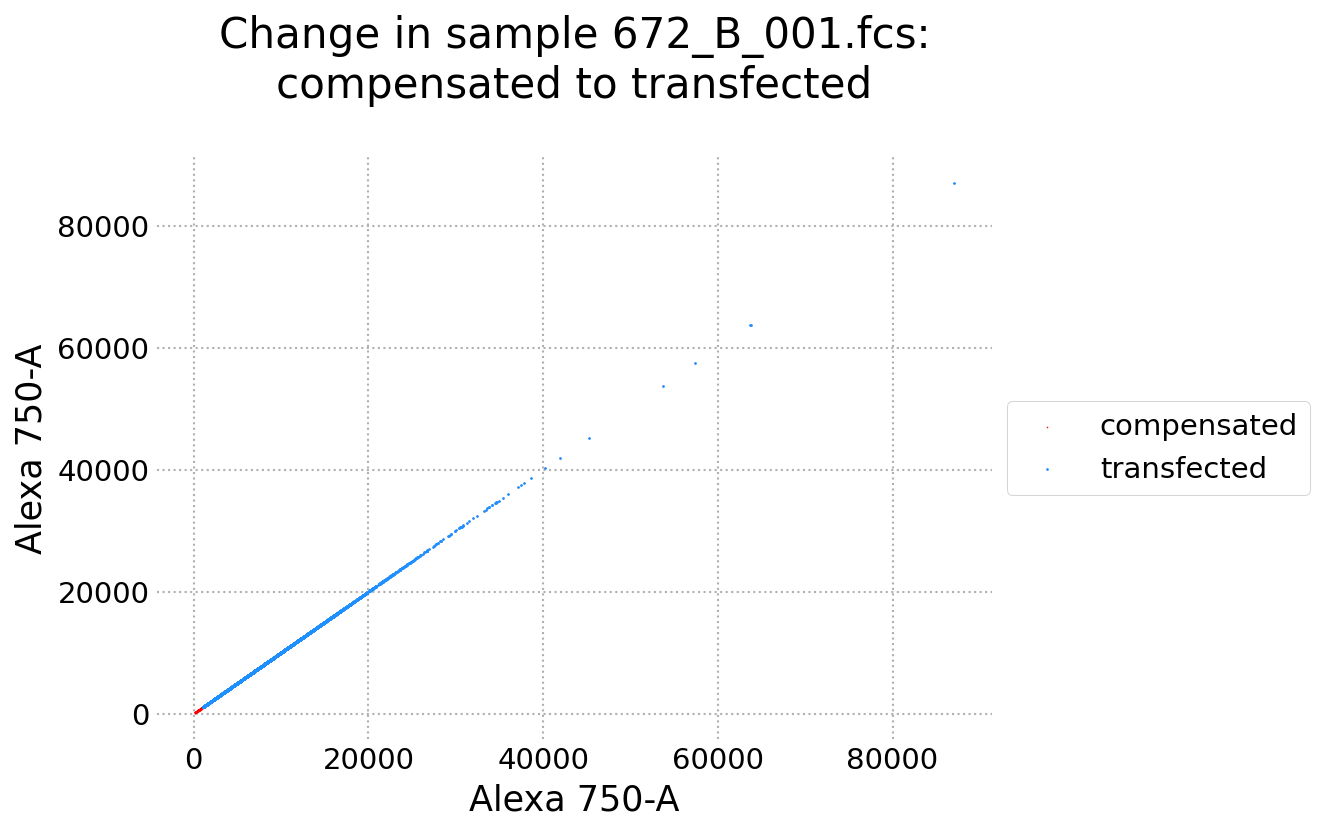

373_K_003.fcs


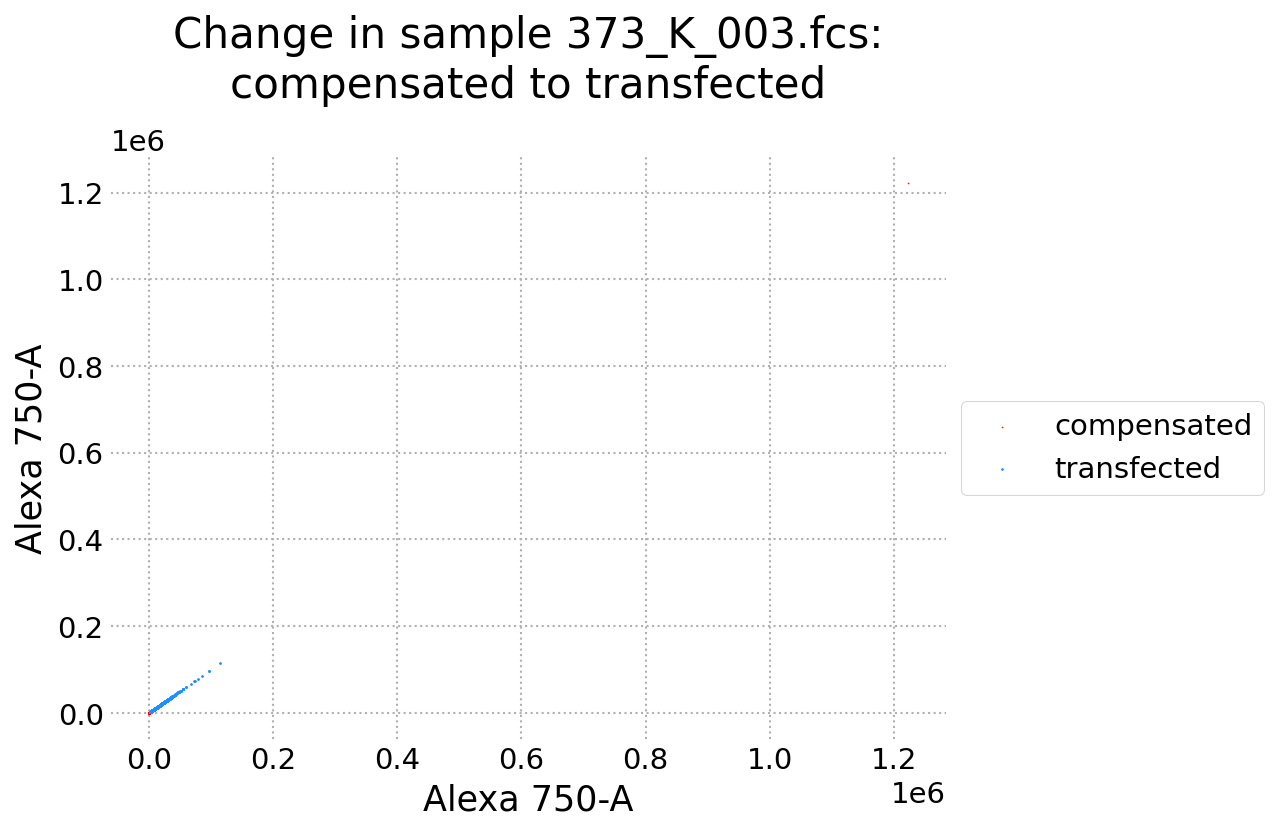

In [9]:
my_wrkspc.apply_gate(
    sample_collection_name="compensated",
    new_sample_collection_name="transfected",
    gating_function=pfb.gating.gate_high_low,
    gating_channel_name="Alexa 750-A",
    gating_channel_names=["Alexa 750-A","Alexa 750-A"],
    low=pfb.gating.find_percentile(
        workspace=my_wrkspc,
        sample_collection_name="compensated",
        sample_name="Colors_Filler.fcs",
        channel_name="Alexa 750-A",
        percentile=99
    )
)

In [10]:
extraction = my_wrkspc.create_statistic_extraction(
    sample_collection_name='transfected',
    statistics_collection_name='samples',
    include=['.fcs'],
    not_include=['Beads', 'Controls', 'Colors'],
    statistic_names=['line', 'dox_conc', 'sample','Mean FITC-A', 'Mean PE-Texas Red-A']
)
my_wrkspc.extract_statistic(
    extraction=extraction,
    statistc_name='line',
    operation=pfb.operations.split_sample_name,
    by = '_',
    index = 0
)
my_wrkspc.extract_statistic(
    extraction=extraction,
    statistc_name='dox_conc',
    operation=pfb.operations.split_sample_name,
    by = '_',
    index = 1
)
my_wrkspc.extract_statistic(
    extraction=extraction,
    statistc_name='sample',
    operation=pfb.operations.split_sample_name,
    by = '_',
    index = 2
)
my_wrkspc.extract_statistic(
    extraction=extraction,
    statistc_name='Mean FITC-A',
    operation=pfb.operations.channel_mean,
    channel_name = 'FITC-A' 
)
my_wrkspc.extract_statistic(
    extraction=extraction,
    statistc_name='Mean PE-Texas Red-A',
    operation=pfb.operations.channel_mean,
    channel_name = 'PE-Texas Red-A'
)

In [11]:
my_wrkspc.combine_replicates(
    statistics_collection_name='samples',
    combined_statistics_collection_name='samples combined',
    combine_by=['dox_conc', 'line'],
    combination_operations={
        'Mean FITC-A': 'mean',
        'Mean PE-Texas Red-A': 'mean'
    },
    sem_cols=[
       'Mean FITC-A',
       'Mean PE-Texas Red-A' 
    ]
)

In [12]:
my_wrkspc.apply_operation(
    statistics_collection_name="samples combined",
    new_statistics_collection_name="samples converted",
    statistic_name="Mean FITC-A",
    new_statistic_name="Mean FITC-A",
    operation=pfb.operations.non_negative
)
my_wrkspc.apply_operation(
    statistics_collection_name="samples combined",
    new_statistics_collection_name="samples converted",
    statistic_name="Mean PE-Texas Red-A",
    new_statistic_name="Mean PE-Texas Red-A",
    operation=pfb.operations.non_negative
)
my_wrkspc.apply_operation(
    statistics_collection_name="samples converted",
    new_statistics_collection_name="samples converted",
    statistic_name="Mean FITC-A",
    new_statistic_name="MEFLs",
    operation=pfb.operations.apply_conversion_factor,
    factor=my_wrkspc.conversion_factors["FITC-A"]
)
my_wrkspc.apply_operation(
    statistics_collection_name="samples converted",
    new_statistics_collection_name="samples converted",
    statistic_name=["Mean FITC-A", "Mean FITC-A_stdErr"],
    new_statistic_name="MEFLs_stdErr",
    operation=pfb.operations.compute_conversion_factor_stdErr,
    factor=my_wrkspc.conversion_factors["FITC-A"],
    factor_err=my_wrkspc.conversion_factors["FITC-A_stderr"]
)
my_wrkspc.apply_operation(
    statistics_collection_name="samples converted",
    new_statistics_collection_name="samples converted",
    statistic_name="Mean PE-Texas Red-A",
    new_statistic_name="MEPTRs",
    operation=pfb.operations.apply_conversion_factor,
    factor=my_wrkspc.conversion_factors["PE-Texas Red-A"]
)
my_wrkspc.apply_operation(
    statistics_collection_name="samples converted",
    new_statistics_collection_name="samples converted",
    statistic_name=["Mean PE-Texas Red-A", "Mean PE-Texas Red-A_stdErr"],
    new_statistic_name="MEPTRs_stdErr",
    operation=pfb.operations.compute_conversion_factor_stdErr,
    factor=my_wrkspc.conversion_factors["PE-Texas Red-A"],
    factor_err=my_wrkspc.conversion_factors["PE-Texas Red-A_stderr"]
)

/Users/elliberes/leonard-lab/pyflowbat/pyflowbat/pyflowbat/operations.py:57: RuntimeWarning: divide by zero encountered in scalar divide
  return x[0] * factor * np.sqrt((x[1]/x[0])**2+(factor_err/factor)**2)
/Users/elliberes/leonard-lab/pyflowbat/pyflowbat/pyflowbat/operations.py:57: RuntimeWarning: invalid value encountered in scalar multiply
  return x[0] * factor * np.sqrt((x[1]/x[0])**2+(factor_err/factor)**2)


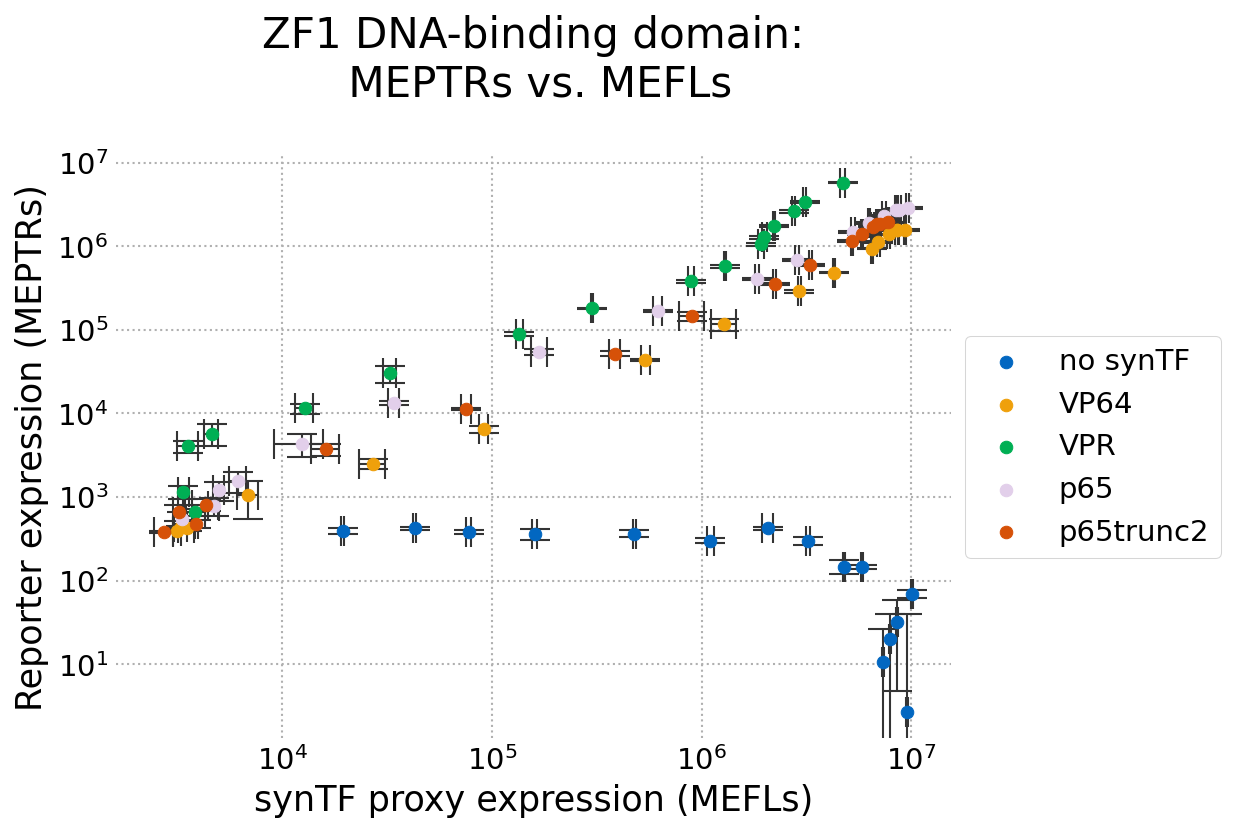

In [13]:
my_wrkspc.graph_statistics(
    data=[
        ["samples converted", 'MEFLs', 'MEPTRs', ('line', '373')],
        ["samples converted", 'MEFLs', 'MEPTRs', ('line', '664')],
        ["samples converted", 'MEFLs', 'MEPTRs', ('line', '665')],
        ["samples converted", 'MEFLs', 'MEPTRs', ('line', '666')],
        ["samples converted", 'MEFLs', 'MEPTRs', ('line', '667')]
    ],
    errors=[True, True],
    legend=["no synTF", "VP64", "VPR", "p65", "p65trunc2"],
    title="ZF1 DNA-binding domain:\n MEPTRs vs. MEFLs",
    labels=["synTF proxy expression (MEFLs)", "Reporter expression (MEPTRs)"],
    xlog=True,
    ylog=True,
    save=True
)

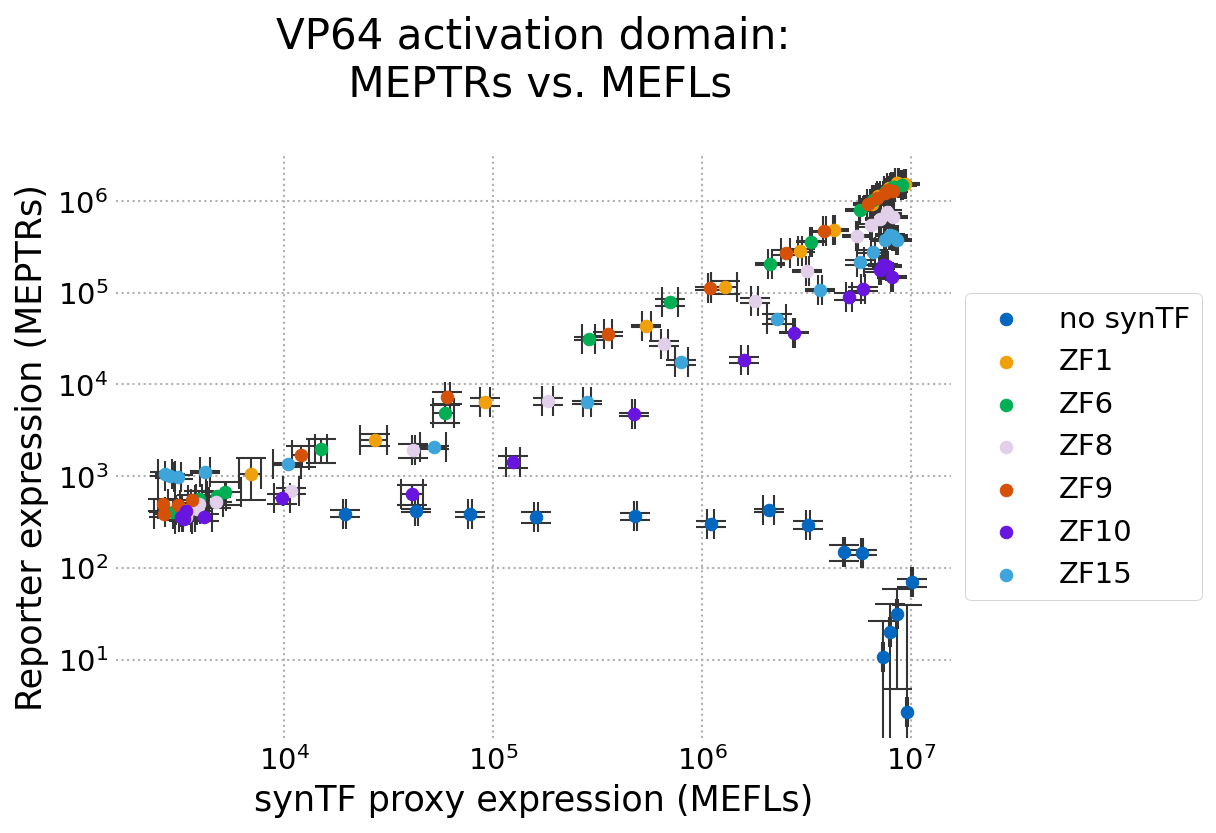

In [14]:
my_wrkspc.graph_statistics(
    data=[
        ["samples converted", 'MEFLs', 'MEPTRs', ['line', '373']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['line', '664']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['line', '668']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['line', '669']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['line', '670']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['line', '671']],
        ["samples converted", 'MEFLs', 'MEPTRs', ['line', '672']]
    ],
    errors=[True, True],
    legend=["no synTF", "ZF1", "ZF6", "ZF8", "ZF9", "ZF10", "ZF15"],
    title="VP64 activation domain:\n MEPTRs vs. MEFLs",
    labels=["synTF proxy expression (MEFLs)", "Reporter expression (MEPTRs)"],
    xlog=True,
    ylog=True,
    save="example_string_figure_title.png"
)

In [15]:
my_wrkspc.stats_collections['samples converted'].to_csv("ebrc-example-output.csv")

Total execution times (manually measured):
1. 15.42
2. 14.14
3. 12.96
4. 14.01

mean:
14.1325

std:
1.0078814414404103
